In [25]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import preprocessing

df = pd.read_csv("master.csv")

In [26]:
age_groups = {'5-14 years':0, '15-24 years':1, '25-34 years':2, '35-54 years':3, '55-74 years':4, '75+ years':5}
df = df.replace({'age': age_groups})

In [27]:
del df['suicides_no']
del df['country-year']
del df['HDI for year']
del df['generation']
del df['population']
del df['sex']
del df['country']
del df['year']
del df[' gdp_for_year ($) ']
del df['gdp_per_capita ($)']

In [28]:
df.info()
df.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                27820 non-null  int64  
 1   suicides/100k pop  27820 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 434.8 KB


,age,suicides/100k pop
age,1.000000,0.362587
suicides/100k pop,0.362587,1.000000


<AxesSubplot:xlabel='age', ylabel='suicides/100k pop'>

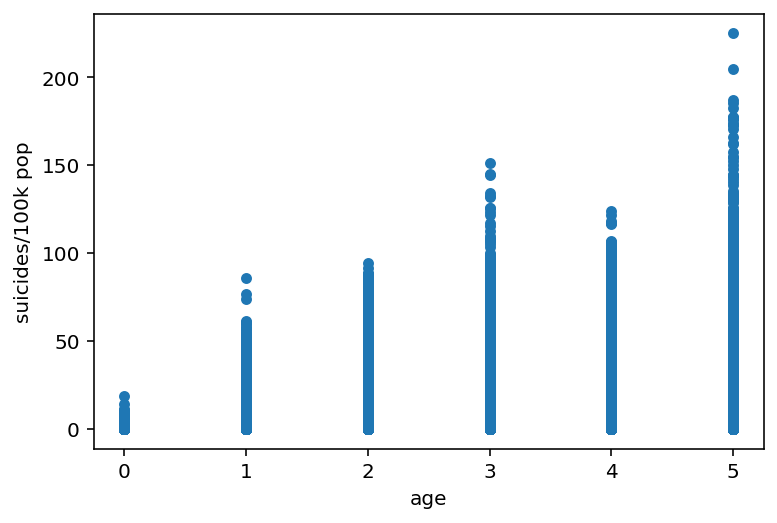

In [29]:
df.plot(kind='scatter',x='age',y='suicides/100k pop')

In [30]:
Y = df.iloc[:, -1:].values
X = df.iloc[:, 0].values

X = X.reshape(-1,1)
Y = Y.reshape(-1)

print(X)
print(Y)

[[1]
 [3]
 [1]
 ...
 [0]
 [0]
 [4]]
[6.71 5.19 4.83 ... 2.17 1.67 1.46]


In [50]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X, Y, test_size = 1/3, random_state = 1)
print(X_Train.shape, X_Test.shape, y_Train.shape, y_Test.shape)

# Fitting Simple Linear Regression to the training set
iso = IsolationForest(contamination=0.15)
yhat=iso.fit_predict(X_Train)
mask = yhat != -1
X_Train, y_Train = X_Train[mask, :], y_Train[mask]
print(X_Train.shape, y_Train.shape)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

model=regressor.fit(X_Train, y_Train) # FITTING MEANS TRAINING

# Predicting the Test set result ￼

Y_Pred = model.predict(X_Test)

(18546, 1) (9274, 1) (18546,) (9274,)


(18546, 1) (18546,)


In [51]:
print(model.coef_)
print(model.intercept_)

[4.03288067]
2.7689256614806723


In [52]:
from sklearn.metrics import mean_absolute_error
yhat = model.predict(X_Test)
mae = mean_absolute_error(y_Test, yhat)
print('MAE: %.3f' % mae)

MAE: 11.106


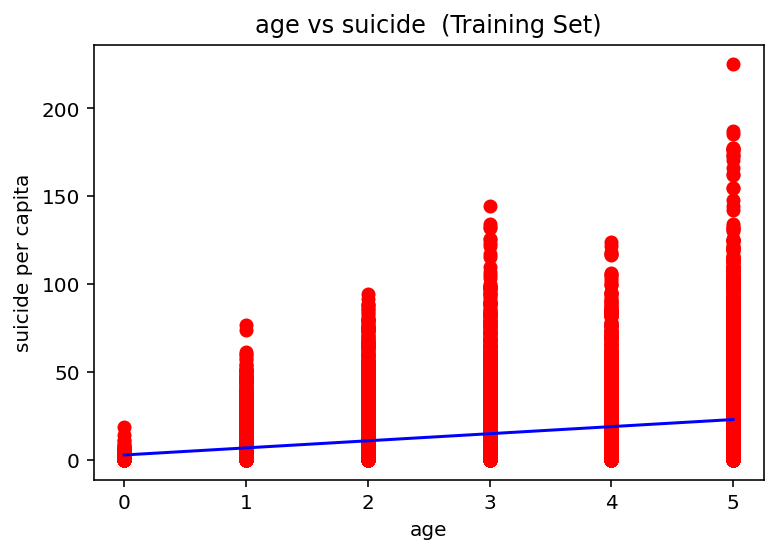

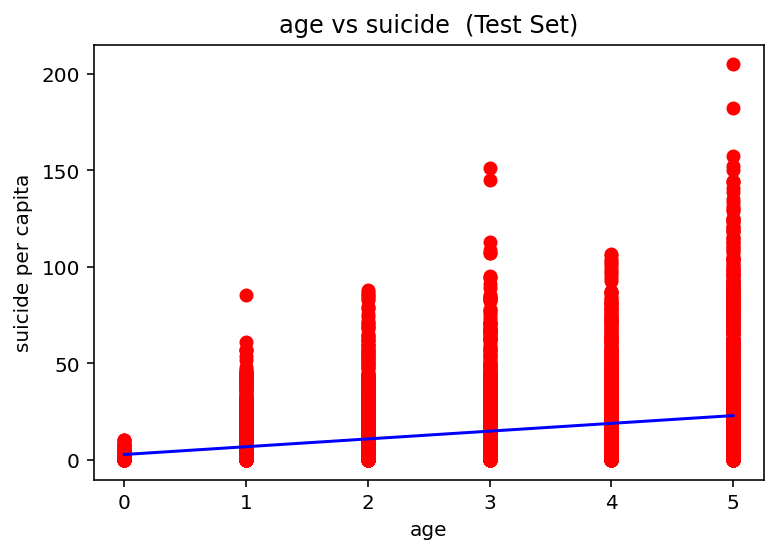

In [53]:
# Visualising the Training set results

plt.scatter(X_Train, y_Train, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('age vs suicide  (Training Set)')
plt.xlabel('age')
plt.ylabel('suicide per capita')
plt.show()

# Visualising the Test set results

plt.scatter(X_Test, y_Test, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('age vs suicide  (Test Set)')
plt.xlabel('age')
plt.ylabel('suicide per capita')
plt.show()

In [54]:
model.score(X, Y)

0.1314627921327628

In [37]:
df.describe()

,age,suicides/100k pop
count,27820.000000,27820.000000
mean,2.502876,12.816097
std,1.706730,18.961511
min,0.000000,0.000000
25%,1.000000,0.920000
50%,3.000000,5.990000
75%,4.000000,16.620000
max,5.000000,224.970000


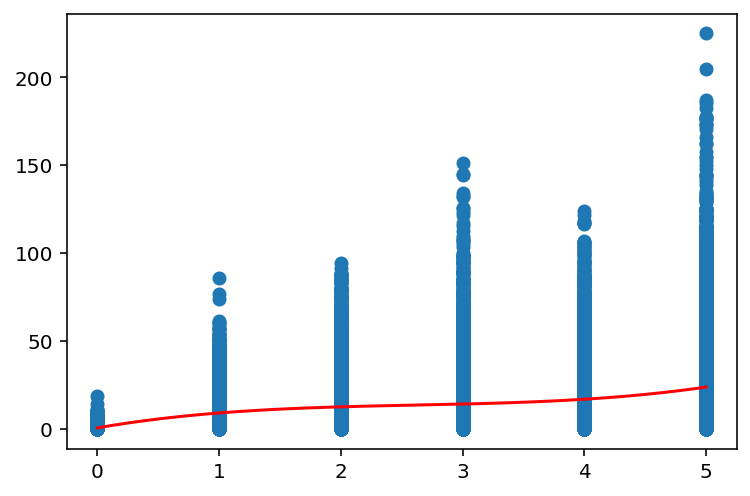

In [38]:
x = df['age']
y = df['suicides/100k pop']

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(0,5,225)

plt.scatter(x,y)
plt.plot(myline, mymodel(myline), color='red')
plt.show()

In [39]:
from sklearn.metrics import r2_score
print(r2_score(y, mymodel(x)))

0.13994425730163684
